# Modelo FitzHugh-Nagumo

Vamos a implementar un modelo de sistema excitable que intenta imitar las neuronas, resolviendo las ecuaciones diferenciales que lo definen.
$$
\dot{v}=v-v^3/3-w+I_{ext} \\
t\dot{w}=v+a-bw
$$


In [63]:
tau=12.5
a=0.7
b=0.8

include("../funcionesFHN01.jl")


#=
function vdot(v,w,I)
    # Esta funcion es la derivada del voltaje
    #=
    esto es un comentario de varias
    lineas 
    =#
    result=0.0
    result=v-v^3-w+I

    return result
end

#forma corta de declarar una funcion
wdot(v, w)=(v+a-b*w)/tau
=#    

wdot (generic function with 1 method)

In [10]:
(v,w,I)=(.50, 0.10, 0.5)

(0.5,0.1,0.5)

In [5]:
vdot(v,w,I)

-505.5

In [6]:
wdot(v,w)

0.568

Vamos a intentar resolver el sistema a lo Euler

In [11]:
epsilon=0.1
for t=0:epsilon:5
    v=v+epsilon*vdot(v,w,I)
    w+=epsilon*wdot(v,w)
end
    

In [13]:
archivonombre="DatosFHM01.dat"
archivo=open(archivonombre,"w")

IOStream(<file DatosFHM01.dat>)

In [14]:
archivo=open(archivonombre,"w")
epsilon=0.1
(v,w,I)=(0.5, 2.0, 0.5)

for t=0:epsilon:100
    v=v+epsilon*vdot(v,w,I)
    w+=epsilon*wdot(v,w)
    println(archivo, t,"\t",v,"\t",w)

end
close(archivo)

In [15]:
datos=readdlm("DatosFHM01.dat");
xxs=datos[:,1]
yys=datos[:,2]
zzs=datos[:,3];

In [17]:
Pkg.add("PyPlot")

INFO: Cloning cache of ColorTypes from git://github.com/JuliaGraphics/ColorTypes.jl.git
INFO: Cloning cache of Colors from git://github.com/JuliaGraphics/Colors.jl.git
INFO: Cloning cache of FixedPointNumbers from git://github.com/JuliaMath/FixedPointNumbers.jl.git
INFO: Cloning cache of LaTeXStrings from git://github.com/stevengj/LaTeXStrings.jl.git
INFO: Cloning cache of MacroTools from git://github.com/MikeInnes/MacroTools.jl.git
INFO: Cloning cache of PyCall from git://github.com/JuliaPy/PyCall.jl.git
INFO: Cloning cache of PyPlot from git://github.com/JuliaPy/PyPlot.jl.git
INFO: Cloning cache of Reexport from git://github.com/simonster/Reexport.jl.git
INFO: Installing ColorTypes v0.2.12
INFO: Installing Colors v0.6.9
INFO: Installing FixedPointNumbers v0.2.1
INFO: Installing LaTeXStrings v0.2.0
INFO: Installing MacroTools v0.3.2
INFO: Installing PyCall v1.7.2
INFO: Installing PyPlot v2.2.4
INFO: Installing Reexport v0.0.3
INFO: Building Conda
INFO: Building PyCall
INFO: PyCall is 

In [18]:
using PyPlot

INFO: Precompiling module PyPlot...
    floattype(Type{#T<:FixedPointNumbers.Fixed}) at /home/karel/.julia/v0.4/FixedPointNumbers/src/fixed.jl:16
is ambiguous with: 
    floattype(Type{FixedPointNumbers.FixedPoint{#T<:Union{Int8, UInt16, Int16, UInt8}, #f<:Any}}) at /home/karel/.julia/v0.4/FixedPointNumbers/src/FixedPointNumbers.jl:89.
To fix, define 
    floattype(Type{FixedPointNumbers.Fixed{_<:Union{Int8, Int16}, #f<:Any}})
before the new definition.
    floattype(Type{#T<:FixedPointNumbers.UFixed}) at /home/karel/.julia/v0.4/FixedPointNumbers/src/ufixed.jl:14
is ambiguous with: 
    floattype(Type{FixedPointNumbers.FixedPoint{#T<:Union{Int8, UInt16, Int16, UInt8}, #f<:Any}}) at /home/karel/.julia/v0.4/FixedPointNumbers/src/FixedPointNumbers.jl:89.
To fix, define 
    floattype(Type{FixedPointNumbers.UFixed{_<:Union{UInt16, UInt8}, #f<:Any}})
before the new definition.


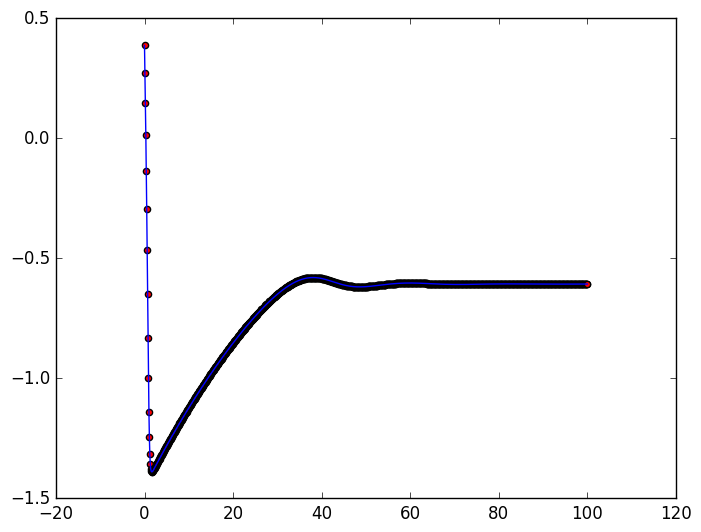

PyObject <matplotlib.collections.PathCollection object at 0x7f8649b8a320>

In [21]:
plot(xxs,yys)
scatter(xxs,yys,c="red")

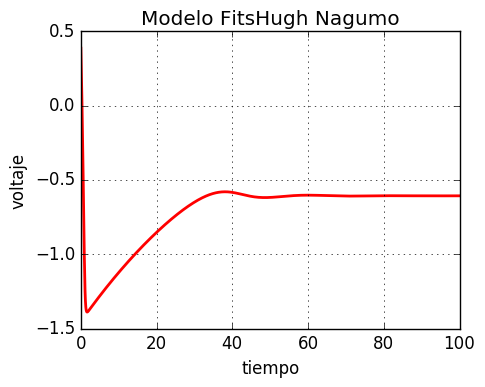

In [30]:
figure(figsize=(5,4))
grid()
xlim(0,100)
ylim(-1.5,0.5)
plot(xxs,yys, lw=2, color="red")
xlabel("tiempo")
ylabel("voltaje")
title("Modelo FitsHugh Nagumo")
tight_layout()
savefig("Disparo01.pdf",dpi=90)

In [31]:
function integraFN!(v,w,I, arxiv, tmax=5*tau,epsilon=0.5,)

    for t=0:epsilon:tmax
        v=v+epsilon*vdot(v,w,I)
        w+=epsilon*wdot(v,w)
        println(arxiv, t,"\t",v,"\t",w)
      
    end
    return "listo"
end

function integraFN!(v,w,I, tmax=5*tau,epsilon=0.5,)

    for t=0:epsilon:tmax
        v=v+epsilon*vdot(v,w,I)
        w+=epsilon*wdot(v,w)
        println(t,"\t",v,"\t",w)
      
    end

end

integraFN! (generic function with 4 methods)

In [32]:
(v,w,I)=(1.0, 0.0, 0.5)
integraFN!(v,w,I)

0.0	1.25	0.078
0.5	1.1094375	0.1478815
1.0	1.157439057647583	0.21744685430590333
1.5	1.102144762099642	0.2825743454521001
2.0	1.0925296322722393	0.3452331516885224
2.5	1.0641447178870456	0.40475147954997154
3.0	1.0413204798170341	0.4614522513970538
3.5	1.016677526300192	0.5153528804043558
4.0	0.9919040306299707	0.5665377494566153
4.5	0.9666330735156545	0.6150738644146297
5.0	0.940811614681715	0.6610239653406302
5.5	0.9143367961928675	0.7044446702974447
6.0	0.887084694318145	0.7453858286206523
6.5	0.8589021138267525	0.7838895666578615
7.0	0.8295968280867458	0.8199889736482797
7.5	0.7989236706635559	0.853706273318077
8.0	0.7665642559409287	0.8850502428095357
8.5	0.7320967277543895	0.9140125041498062
9.0	0.6949495017046549	0.9405620840851986
9.5	0.6543286082646549	0.9646372417250584
10.0	0.6091002270662161	0.9861328590725051
10.5	0.5575948789142182	1.0048804027387537
11.0	0.4972706338467956	1.0206150552049853
11.5	0.42411635856157787	1.032920027780889
12.0	0.331570625624981	1.041129411916

In [60]:
archivo=open(archivonombre,"w")
@time for vini=-1:0.2:1, wini=-1:0.2:1, Iini=-1:0.5:1
    
    (vau,wau,Iau)=(vini,wini,Iini)

    integraFN!(vau,wau,Iau, archivo, 50,0.5)

end
close(archivo)

  0.175635 seconds (1.53 M allocations: 31.720 MB, 4.10% gc time)


In [34]:
datos=readdlm("DatosFHM01.dat");
xxs=datos[:,1]
yys=datos[:,2]
zzs=datos[:,3];

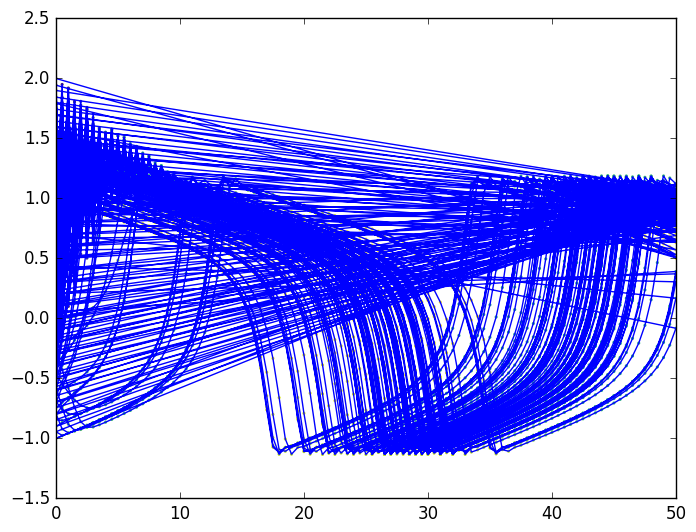

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8647169198>

In [38]:
xlim(0,50)
scatter(xxs,yys, c=zzs, cmap="viridis", edgecolors="None", s=5 )
plot(xxs,yys)

In [39]:
size(datos)

(12221,3)

In [40]:
12221/121

101.0

In [41]:
datos2=reshape(datos, 101,121*3)

101x363 Array{Float64,2}:
  0.0   0.0   0.0   0.0   0.0   0.0   0.0  …  0.6568    0.8464    1.036  
  0.5   0.5   0.5   0.5   0.5   0.5   0.5     0.708086  0.889767  1.07013
  1.0   1.0   1.0   1.0   1.0   1.0   1.0     0.758546  0.931269  1.10246
  1.5   1.5   1.5   1.5   1.5   1.5   1.5     0.806077  0.970695  1.13306
  2.0   2.0   2.0   2.0   2.0   2.0   2.0     0.851601  1.00816   1.16197
  2.5   2.5   2.5   2.5   2.5   2.5   2.5  …  0.894894  1.04373   1.18926
  3.0   3.0   3.0   3.0   3.0   3.0   3.0     0.936112  1.07745   1.21496
  3.5   3.5   3.5   3.5   3.5   3.5   3.5     0.975303  1.1094    1.23913
  4.0   4.0   4.0   4.0   4.0   4.0   4.0     1.01254   1.13961   1.26182
  4.5   4.5   4.5   4.5   4.5   4.5   4.5     1.04788   1.16816   1.28306
  5.0   5.0   5.0   5.0   5.0   5.0   5.0  …  1.08139   1.19509   1.30289
  5.5   5.5   5.5   5.5   5.5   5.5   5.5     1.11312   1.22045   1.32136
  6.0   6.0   6.0   6.0   6.0   6.0   6.0     1.14314   1.24429   1.3385 
  ⋮         

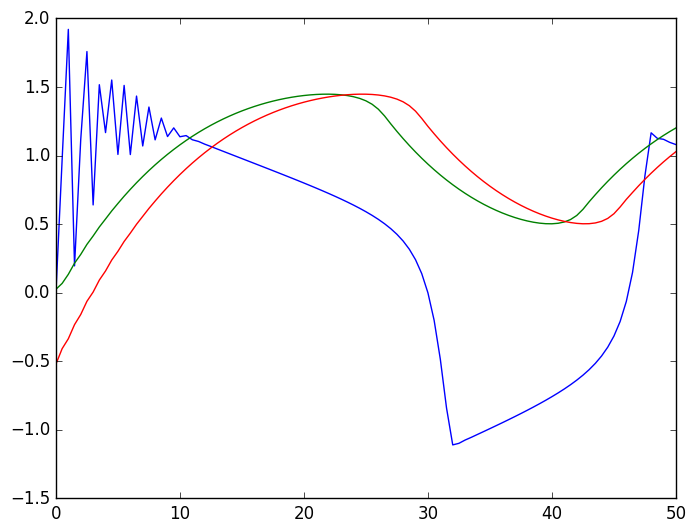

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f864723e2b0>

In [46]:
plot(datos2[:,1], datos2[:,122])
plot(datos2[:,1], datos2[:,281])
plot(datos2[:,1], datos2[:,300])

In [50]:
datos2[:,20]==datos2[:,30]

true

In [51]:
tiempos=datos2[:,1]

101-element Array{Float64,1}:
  0.0
  0.5
  1.0
  1.5
  2.0
  2.5
  3.0
  3.5
  4.0
  4.5
  5.0
  5.5
  6.0
  ⋮  
 44.5
 45.0
 45.5
 46.0
 46.5
 47.0
 47.5
 48.0
 48.5
 49.0
 49.5
 50.0

In [52]:
voltajes=datos2[:,121:242]

101x122 Array{Float64,2}:
  0.0   0.0        -0.1        -0.2       …  1.2       1.1       1.0     
  0.5   0.97        0.7257      0.4844       1.1076    1.0613    0.982   
  1.0   1.92022     1.73214     1.41751      1.12797   1.04936   0.964453
  1.5   0.195821    0.775065    1.3996       1.09512   1.03065   0.946896
  2.0   1.11634     1.66681     1.37772      1.08296   1.01323   0.929315
  2.5   1.75851     0.866892    1.36187   …  1.06359   0.995656  0.911695
  3.0   0.640288    1.61953     1.33818      1.04636   0.978108  0.894018
  3.5   1.51677     0.899277    1.32478      1.02867   0.960561  0.876266
  4.0   1.16767     1.5442      1.29932      1.0111    0.943     0.858415
  4.5   1.55098     0.987319    1.2877       0.993546  0.925412  0.84044 
  5.0   1.00843     1.47777     1.26174   …  0.975999  0.90778   0.822313
  5.5   1.51163     1.03824     1.25011      0.95845   0.890089  0.803999
  6.0   1.00751     1.40024     1.2256       0.940887  0.872316  0.78546 
  ⋮         

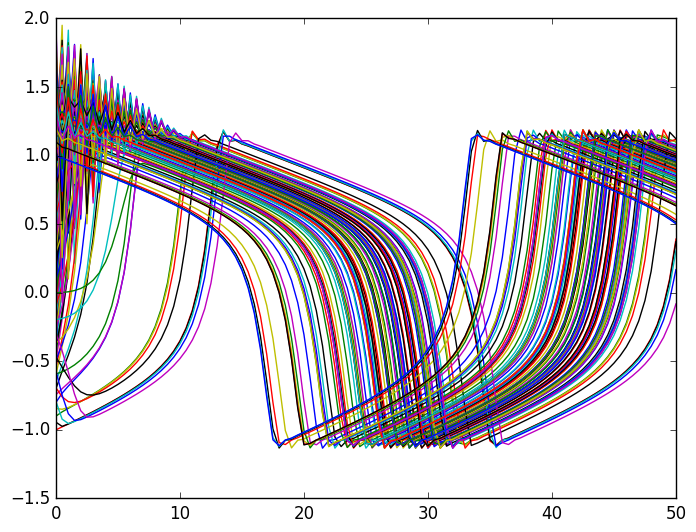

In [58]:
for columna=3:size(voltajes,2)
    plot(tiempos, voltajes[:,columna])
end

In [56]:
size(voltajes,1)

101